In [1]:
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, RandomHorizontalFlip, RandomVerticalFlip
from sklearn.metrics import f1_score
import numpy as np
from torchvision import transforms
import UNET
import UNET2
import matplotlib.pyplot as plt
#from tqdm import tqdm
import tifffile
import skimage
import kornia
torch.manual_seed(17)
import random
import time
from patchify import patchify, unpatchify

In [2]:
data_path ='data/registered/output/fixed_low_res.tif'
data = tifffile.imread(data_path)
print (data.shape)

target_path = 'data/registered/output/registered_mask.tif'
target = tifffile.imread(target_path)
print (target.shape)

(123, 235, 165)
(123, 235, 165)


In [3]:
def load_checkpoint(checkpoint, model):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])

model = UNET.UNet(in_channels=1, out_channels=1)
load_checkpoint(torch.load("my_checkpoint.pth.tar"), model)


=> Loading checkpoint


In [5]:
def padd_to_proper(data, target):
    padded_image = np.pad(data[:,53:-54,6:-10], ((0, 128-123), (0,0), (0, 0)), mode='constant')
    padded_target = np.pad(target[:,53:-54,6:-10], ((0, 128-123), (0,0), (0, 0)), mode='constant') 
    #padded_image = np.pad(data[:,:,16:], ((0, 128-123), (11,10), (0, 0)), mode='constant') 
    return padded_image[:,:,:-21], padded_target[:,:,:-21]

In [6]:
data , target = padd_to_proper(data,target)
print ('data shape = ',data.shape)
print ('target shape = ',target.shape)

data shape =  (128, 128, 128)
target shape =  (128, 128, 128)


In [7]:
list(model.children())[0]

DoubleConv(
  (double_conv): Sequential(
    (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
)

In [27]:
input_ = data[0:32,0:32,0:32]
input = torch.from_numpy(input_).float()
input = input.unsqueeze(dim = 0)
input = input.unsqueeze(dim = 0)
print ('input shape',input.shape)
output = model(input)
output = output.squeeze(dim = 0)
output = output.squeeze(dim = 0)
output = (output>0.5).float().numpy()
print ('output shape',output.shape)


input shape torch.Size([1, 1, 32, 32, 32])
output shape (32, 32, 32)


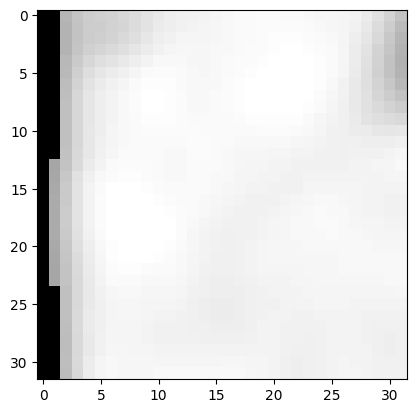

In [24]:
plt.imshow(input_[10],'gray')

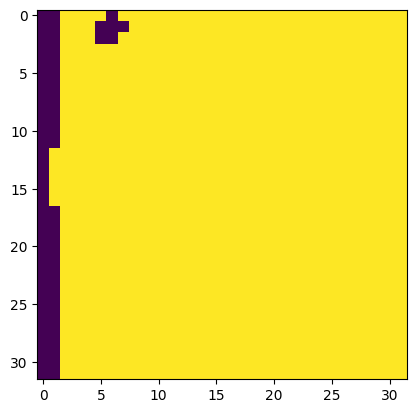

In [28]:
plt.imshow(output[10])